
 ## Project: Iris Flowers Classification Using Support Vector Machine Algorithm

### Major: Computer Science and Technology


### 1. Project Objective:

Data mining techniques and support vector machine classifiers will be utilized in this study to identify the three types of iris flowers from Iris dataset that has been prepared in advance by the biologists who investigated the flower types through the use of certain measurements and statistics. 

Upon completion of the project, the classifier model should be able to classify Iris flowers into three distinct classifications, and users will not need to specify which class an Iris belongs to; the classifier will do this all on its own.



### 2. Dataset Information:

Iris dataset is a set of data contains three classes of 50 instances each, where each class represents a type of iris plant. 

The attribute data consist of sepal length, sepal width, and petal length and petal width. These attributes are all expressed in centimeters (cm).  

In [1]:
from PIL import Image
three_classes = Image.open(r'Iris-dataset/svm.png')

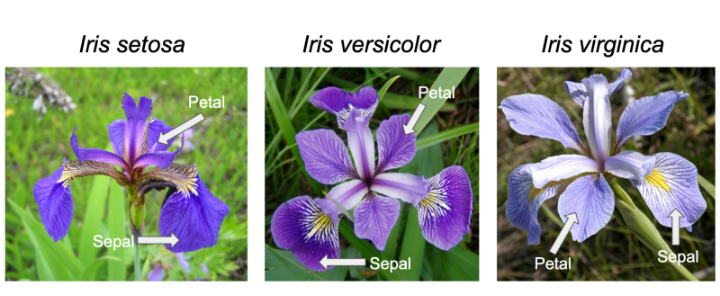

In [2]:
three_classes

### 3. Data Preprocessing:

#### 3.1 Data Exploration:

Through a Data Exploration process, one can gain a thorough understanding of the data in hand and how the different variables interact, which will aid in choosing the appropriate algorithm.   

Machine Learning always starts with Data Exploration first, as it enables us to come up with ideas for improving the model's performance.

#### a. Import the necessary modules

- It's time to import the libraries and load the data from the dataset for this stage. 
- Features are represented by X which contains as well a column called target which represents targets or labels of our dataset.

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Data Preprocessing phase:
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For Algorithm training and testing phase:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


import warnings

warnings.filterwarnings('ignore')

#### b. Load iris dataset as pandas dataframe

In [4]:
# Load the dataset.
iris = datasets.load_iris()

In [5]:
# Check list of the features in the dataset.
print("Features names: ", iris.feature_names)

# Similarly for the labels.
print("Labels: ", iris.target_names)

Features names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [6]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

X["target"] = iris.target

In [7]:
# Rename the columns respecting the conventions instead of 
# using separated words as a columns' names
X = X.rename(columns={'sepal length (cm)':'SepalLengthCm',
                      'sepal width (cm)':'SepalWidthCm',
                      'petal length (cm)':'PetalLengthCm',
                      'petal width (cm)':'PetalWidthCm'})

In [8]:
# Check the first 5 lines from the dataframe.
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**N.T.:** for the target column a value of 0 means setosa class, 1 means versicolour class and finally 2 stands for the virginica class.

In [9]:
# datatype info; the main goal is to get a concise summary of our dataframe.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   target         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### c. The use of plots, histograms, and heatmaps to explore the separability of data and the relation between features:

- Using matplotlib, we will plot the classes with axis x and y representing two of our features. 
- The purpose of doing that is to determine whether certain features contribute more to the separation of the dataset than others.

In [10]:
# Create a function to plot all the features we have easily
def displayXyRelation(x, y):
    
    plt.scatter(x, y, c = np.array(list(X.target.values)), s=10)
    plt.xlabel(x.name)
    plt.ylabel(y.name)

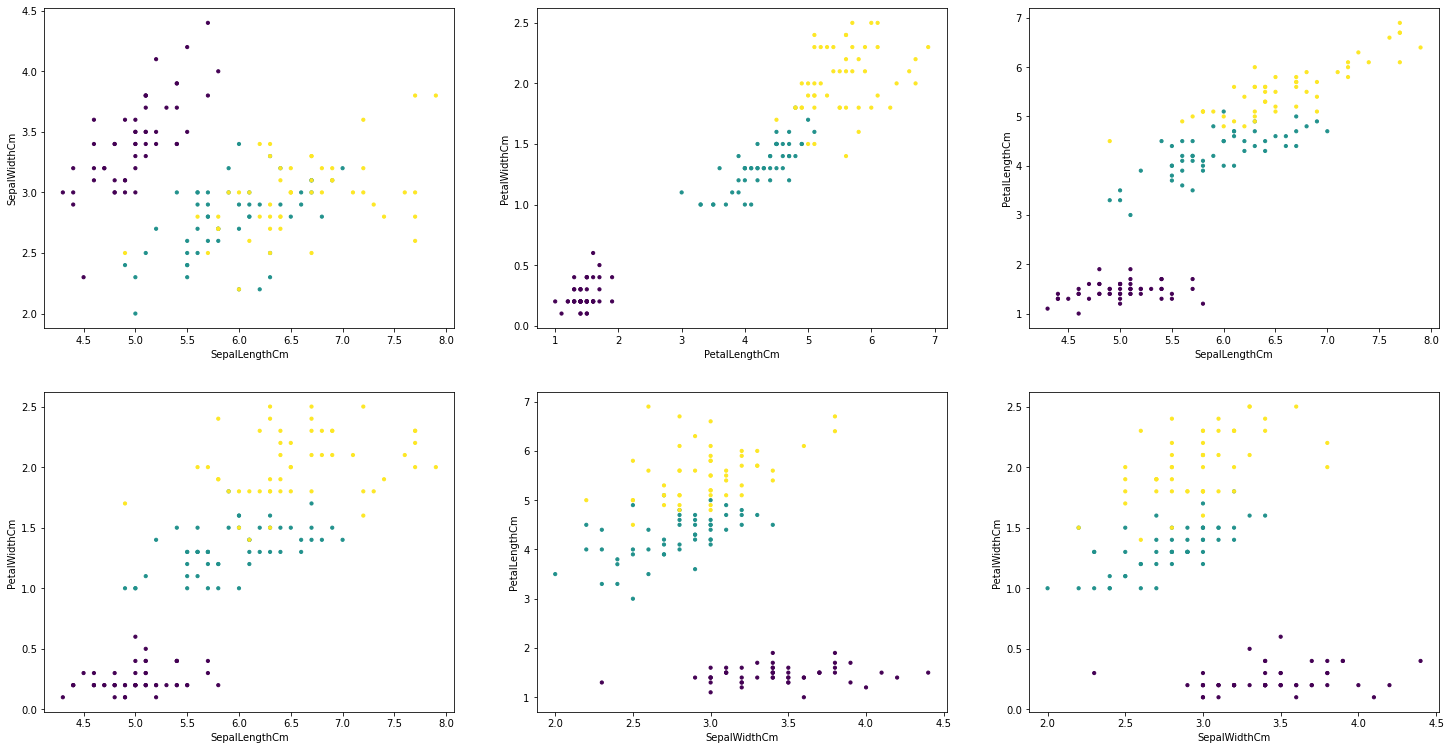

In [11]:
f = plt.figure(figsize=(25,20))

f.add_subplot(331)
displayXyRelation(X.SepalLengthCm, X.SepalWidthCm)

f.add_subplot(332)
displayXyRelation(X.PetalLengthCm, X.PetalWidthCm)

f.add_subplot(333)
displayXyRelation(X.SepalLengthCm, X.PetalLengthCm)

f.add_subplot(334)
displayXyRelation(X.SepalLengthCm, X.PetalWidthCm)

f.add_subplot(335)
displayXyRelation(X.SepalWidthCm, X.PetalLengthCm)

f.add_subplot(336)
displayXyRelation(X.SepalWidthCm, X.PetalWidthCm)

- In these scatters, we can notice that one class can be linearly separated from the other two, and the latter are not linearly separated from each other.

A correlation between features and the label vector needs to be examined as well.

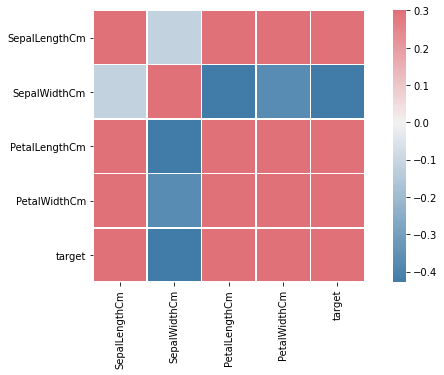

In [12]:
correlation = X.corr()
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)
plt.show()

- The correlation matrix shows how much are the features and the target correlated which can give us some hints about the feature importance.
- The Heatmap of correlation indicates that all features have either a strong positive or negative correlation with the target.

In order to better understand the data statistically, let's check the histograms of its features.

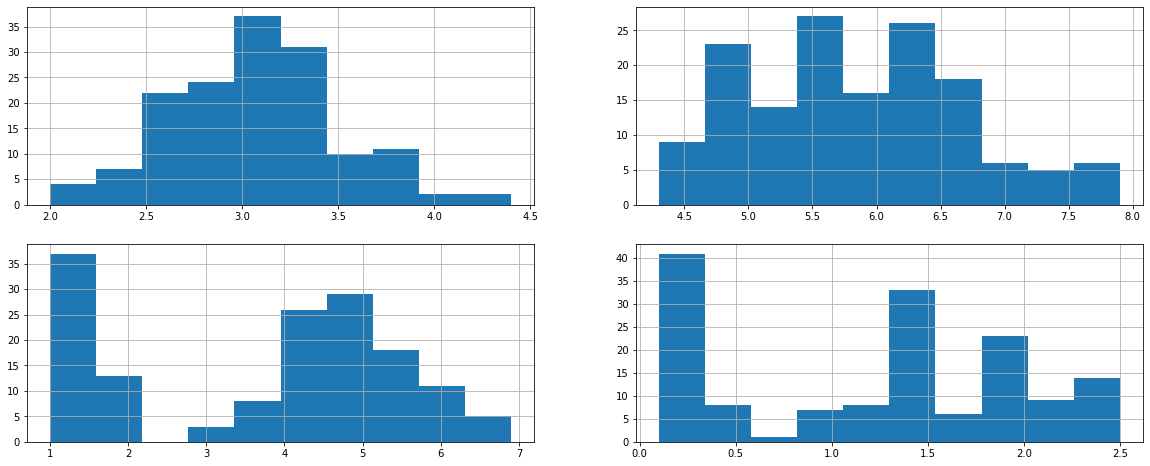

In [13]:
f = plt.figure(figsize=(20,8))

f.add_subplot(221)
X.SepalWidthCm.hist()

f.add_subplot(222)
X.SepalLengthCm.hist()

f.add_subplot(223)
X.PetalLengthCm.hist()

f.add_subplot(224)
X.PetalWidthCm.hist()

plt.show()

**N.T.:** 
   - When data are skewed, the majority of the data are located on one side of the histogram.

#### 3.2 Data Cleaning:

In petal, there appear to be some outliers that we will examine further using boxplots and z-scores methods. If a point exceeds 2.5 standard deviation, it will be considered an outlier. 

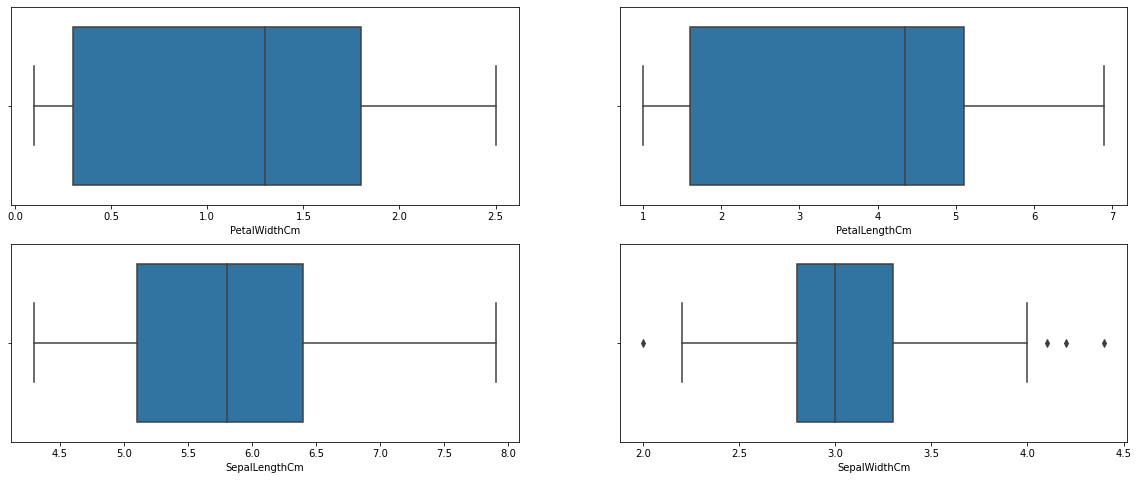

In [14]:
f = plt.figure(figsize=(20,8))

f.add_subplot(221)
sns.boxplot(x=X['PetalWidthCm'])

f.add_subplot(222)
sns.boxplot(x=X['PetalLengthCm'])

f.add_subplot(223)
sns.boxplot(x=X['SepalLengthCm'])

f.add_subplot(224)
sns.boxplot(x=X['SepalWidthCm'])

plt.show()

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution

How does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. 

In [15]:
threshold = 2.5
z = np.abs(stats.zscore(X))
zee = (np.where(z > threshold))[1]

print("Number of data samples considered as outliers = %i " % len(zee))

Number of data samples considered as outliers = 2 


In [16]:
delete_outliers = X[(z >= threshold)]
delete_outliers.drop_duplicates(keep= 'first', inplace=True)

unique, count= np.unique(delete_outliers["target"], return_counts=True)
print("The number of occurances of each class in the dataset = %s " 
      % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {0: 2}  



In [17]:
X = X[(z <= 2.5)]

# Removing the label from the training data
y = X["target"]
X = X.drop(["target"], axis = 1)

Using the Standard Scaler to transform the data in order to be in normal distribution:

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The transformed data is now ready to be split into train and test. As a general rule, the data will be split into 80% training and 20% testing sets. 

To get consistent results when rerunning the code, we set the random state to a constant value.

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, 
                                                    test_size=0.2, random_state=42)

### 4. Algorithm Training and Testing:

The wise thing is to always consider the data that we have in a project using svm algorithm is linearly separable and start by trying linearSVC first.

In [20]:
classifier = LinearSVC(penalty='l2', loss='squared_hinge',
                       dual=True, tol= 0.0001, C= 10, multi_class='ovr',
                       fit_intercept=True, random_state=0, max_iter=1000)

classifier.fit(X_train,y_train)

# classifier.score is actually for the SVC class, 
# and it returns the mean accuracy on the given data and labels.
print('Accuracy of linear SVC on training set: {:.2f}'
      .format(classifier.score(X_train, y_train)* 100))

print('Accuracy of linear SVC on test set: {:.2f}'
      .format(classifier.score(X_test, y_test)* 100))

Accuracy of linear SVC on training set: 96.49
Accuracy of linear SVC on test set: 97.33


In [21]:
prediction = classifier.predict(X_test)
print(confusion_matrix(y_test, prediction))

[[51  0  0]
 [ 0 53  2]
 [ 0  2 42]]


##### Interpretation:
- There are 51 times the model predicted the species is setora ( 0) and it's correct.
- There are 53 times the model predicted the species is versicolor( 1) and it's correct.
- There are 2 times the model predicted the species is virginica (2) and the true species is versiscolor(1)
- There are 42 times the model predicted the species is virginica (2) and it's correct.
- There are 2 times the model predicted the species is versiscolor(1) and the true species is virginica(2)

For a linear kernel, we just need to optimize the C parameter. 

Tuning parameters value for machine learning algorithms effectively improves the model performance.

Let's tune the C parameter to see if we can improve the results:

- The tuning will be automated using the grid search algorithm imported from Scikit-Learn.
- For c parameters, we will use an exponential range with base = 1.02

In [22]:
C = np.logspace(start = 0, stop = 1000, base = 1.02)
param_grid = {'C': C}
grid = GridSearchCV(classifier, param_grid =param_grid, 
                    cv=4, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f" 
      % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} "
      .format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 25.35768925061414} with a score of 97.49
Best estimator accuracy on test set 97.33 


In [23]:
predic = grid.predict(X_test)
print(confusion_matrix(y_test, predic))

[[51  0  0]
 [ 0 53  2]
 [ 0  2 42]]


After tuning the C parameter with grid search, the training results are slightly improved and the test score is unchanged, indicating that the model is not overfit or underfit. 

##### Plotting: 
For simplicity, We will demonstrate the binary classification using SVMs. So We will take only the two classes of the flowers, i.e. Setosa and Versicolor. Also we will take into consideration only their petal length and petal width.

In [24]:
#We will extract data from iris into arrays for easier implementation purposes. 
#In iris databunch, we take the data part and in data part 
#we take the first 50 entries of the 2sd row (index i=1 means 2sd row as index starts from 0)
petal_length_setosa = iris['data'][:50, (1)]
petal_width_setosa = iris['data'][:50, (2)]
petal_length_versicolor = iris['data'][50:100, (1)]
petal_width_versicolor = iris['data'][50:100, (2)]

The decision boundary for SVMs is given by $w*x + b = 0$. Where $x$ and $w$ both represent vectors. 

N.T.: 
- $b$ is the intercept_ attribute of LinearSVC
- $x$ is the position vector $X$ of the data point and not the $x$-coordinate, so, the calculation of the $x$ and $y$ coordiantes goes as follows:

$$(w[0]_i + w[1]_j).(x_i + y_j) + b = 0 $$

$$w[0] * x + w[1] * y + b = 0$$

$$y = (- w[0]*x - b )/w[1]$$


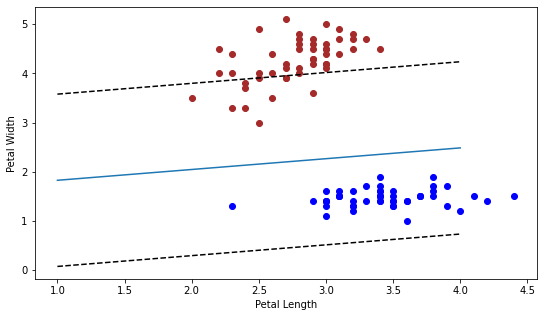

In [25]:
#We will plot the extracted data
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)

#We plot setosa flower
ax.scatter(petal_length_setosa, petal_width_setosa, color='blue') 
#We plot versicolor flower
ax.scatter(petal_length_versicolor, petal_width_versicolor, color='brown') 

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#We plot the decision boundary
# w.x + b = 0 is the decision boundary 
w = grid.best_estimator_.coef_[0]  

#We tale arbitrary values of x to construct a line using the slope and intercept
x1=1     
x2=4
#We calculate the values of y-coordinate from x
y1 = -(x1*w[0]+grid.best_estimator_.intercept_[0])/w[1]    
y2 = -(x2*w[0]+grid.best_estimator_.intercept_[0])/w[1]     

#We plot the line using two co-ordinates
plt.plot([x1,x2],[y1,y2])           
 
#We plot the support vectors of both the classes, The +1,-1 here stands for 
#the distance between the decision boundary and support vector in either direction
y1 = -(x1*w[0]+grid.best_estimator_.intercept_[0]-1)/w[1] 
y2 = -(x2*w[0]+grid.best_estimator_.intercept_[0]-1)/w[1]
plt.plot([x1,x2],[y1,y2],'k--')                 

y1 = -(x1*w[0]+grid.best_estimator_.intercept_[0]+1)/w[1]
y2 = -(x2*w[0]+grid.best_estimator_.intercept_[0]+1)/w[1]
plt.plot([x1,x2],[y1,y2],'k--')
plt.show()

However, it is possible to still try to improve the training accuracy by combining non-linear SVC with RBF kernel to ensure that it captures more test data if new data is re-introduced, since the dataset is very small.

In [26]:
classifier_SVC = SVC(C= 0.5 , kernel='rbf', degree=3, gamma= 'auto', 
                     tol=0.001, random_state = 0, max_iter=1000)

classifier_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'
      .format(classifier_SVC.score(X_train, y_train) * 100))
print('Accuracy of SVC on test set: {:.2f}'
      .format(classifier_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 97.83
Accuracy of SVC on test set: 98.67


In [27]:
predict = classifier_SVC.predict(X_test)
print(confusion_matrix(y_test, predict))

[[51  0  0]
 [ 0 54  1]
 [ 0  1 43]]


##### Interpretation:
- There are 51 times the model predicted the species is setora (0) and it's correct.
- There are 54 times the model predicted the species is versicolor( 1) and it's correct.
- There is one time the model predicted the species is virginica (2) and the true species is versiscolor(1)
- There are 43 times the model predicted the species is virginica (2) and it's correct.
- There is one time the model predicted the species is versiscolor(1) and the true species is virginica(2)

While the training score appears to be much better than linear SVC, let's try tuning the gamma and c parameters using grid search.

In [28]:
c = np.logspace(start = 0, stop = 100, base = 2)
gamma_params = np.logspace(-9, 3, 13)

param = dict(gamma = gamma_params, C = c)
classifier_grid = GridSearchCV(classifier_SVC, param_grid =param, 
                               cv=3 , scoring='accuracy')

classifier_grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f" 
      % (classifier_grid.best_params_, classifier_grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} "
      .format(classifier_grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 16.93143859315674, 'gamma': 1.0} with a score of 100.00
Best estimator accuracy on test set 100.00 


In [29]:
predict = classifier_grid.predict(X_test)
matrix = confusion_matrix(y_test, predict)
matrix

array([[51,  0,  0],
       [ 0, 55,  0],
       [ 0,  0, 44]], dtype=int64)

Text(69.0, 0.5, 'truth')

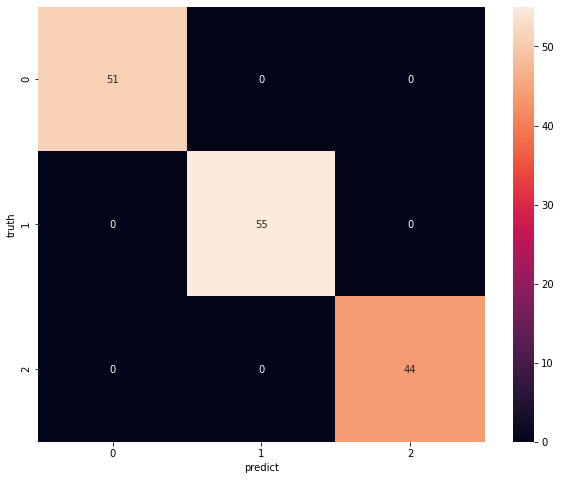

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot= True)
plt.xlabel('predict')
plt.ylabel('truth')

##### Interpretation:

- There are 51 times the model predicted the species is setora (0) and it's correct.
- There are 55 times the model predicted the species is versicolor(1) and it's correct.
- There are 44 times the model predicted the species is virginica (2) and it's correct.

On the training and testing sets, the model improved further after tuning C and gamma parameters, so we'll keep it and consider it as the correct model.